<a href="https://colab.research.google.com/github/henridomingos/googlecolab/blob/main/Eleicoes_Ibov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

In [ ]:
!pip install quantstats

In [115]:
import yfinance as yf
import pandas as pd
import plotly.express as px
import seaborn as sns
import quantstats as qs
import pandas.tseries.offsets as ts

In [138]:
Ibovespa = yf.download('^BVSP', start='1993-01-01')[['Close']]

[*********************100%***********************]  1 of 1 completed


In [ ]:
df = Ibovespa.copy()
df['ano'] = df.index.year
df['dia_do_ano'] = df.index.dayofyear
df

In [ ]:
tabela = df.pivot(index='dia_do_ano', columns='ano', values='Close')
tabela

In [ ]:
tab = tabela.fillna(method='bfill')
tab = (tab / tab.iloc[0]) - 1
tab

In [133]:
anos = [1998,2002,2006,2010,2014,2018,2022]

In [143]:
fig = px.line(
    tab[anos],
    #heigth=600,
    #width=800,
    template= 'plotly_dark',
    title= 'Performance Ibovespa - Eleições',
    labels= {'value':'retorno'}
)

fig.add_vline(x=pd.to_datetime('2022-10-01').dayofyear)
fig.add_vline(x=pd.to_datetime('2022-10-31').dayofyear)
fig.layout.yaxis.tickformat = '.0%'
fig

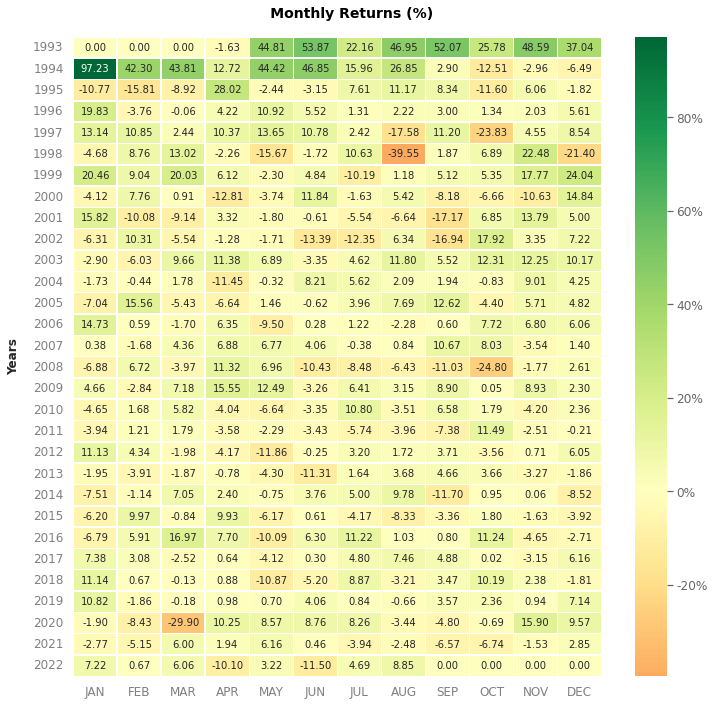

In [139]:
qs.plots.monthly_heatmap(Ibovespa)